<a href="https://colab.research.google.com/github/hxtruong/fb-developer-circles/blob/master/Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
link = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
transactions = pd.read_csv(link,encoding='latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
transactions.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
transactions.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
449706,575138,22666,RECIPE BOX PANTRY YELLOW DESIGN,8,11/8/11 15:24,5.79,NaN,United Kingdom
45828,540288,20752,BLUE POLKADOT WASHING UP GLOVES,1,1/6/11 12:45,2.10,17634.0,United Kingdom
503457,578926,21770,OPEN CLOSED METAL SIGN,1,11/27/11 12:24,4.95,18156.0,United Kingdom
295050,562770,23548,WRAP MAGIC FOREST,25,8/9/11 11:56,0.42,17139.0,United Kingdom
151807,549568,21755,LOVE BUILDING BLOCK WORD,2,4/10/11 15:09,5.95,15665.0,United Kingdom


In [5]:
# Print out brief info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [6]:
transactions.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [7]:
# List all NaN values
transactions[transactions['CustomerID'].isnull()].sample(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
366207,568719,90175A,WHITE GLASS CHUNKY CHARM BRACELET,1,9/28/11 16:19,9.15,NaN,United Kingdom
518842,580124,22138,BAKING SET 9 PIECE RETROSPOT,3,12/1/11 17:12,4.95,NaN,EIRE
491448,578067,85099B,JUMBO BAG RED RETROSPOT,2,11/22/11 15:43,4.13,NaN,United Kingdom
447151,574950,21680,WOODLAND STICKERS,1,11/8/11 9:29,1.63,NaN,United Kingdom
164207,550636,20733,GOLD MINI TAPE MEASURE,3,4/19/11 15:37,0.83,NaN,United Kingdom


**Exclude negative Quatity entries**

In [8]:
transactions[transactions['Quantity']<0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


**Exclude negative Price entries**

In [9]:
transactions[transactions['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [10]:
transactions['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
uk_cus = transactions[transactions['Country'] == 'United Kingdom']
uk_cus['CustomerID'].value_counts().head(1)

17841.0    7983
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [12]:
netherlands_cus = transactions[transactions['Country'] == 'Netherlands']
netherlands_cus['Purchases'] = netherlands_cus['Quantity']*netherlands_cus['UnitPrice']
netherlands_cus.sort_values(by=['Purchases'], ascending=False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchases
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/11 12:11,2.08,14646.0,Netherlands,4992.0


**On which year had the highest sales?**

In [0]:
# Make sure all time is validated.
timeFormat = r'\d+/\d+/\d+\s\d+:\d+'

def checkTime(time):
  if re.match(timeFormat, time):
    return time
  print(time)

for val in transactions['InvoiceDate']:
  checkTime(val)

In [0]:
# t = "6/22/11 12:34"
def splitDate(date, kind="Year"):
  invoiceDate = re.split(' |:|/', date)
  month, day, year, hour, minute = invoiceDate
  year = "20" + year
  if kind == 'Year':
    return year
  elif kind == 'Month':
    return month
  elif kind == 'Day':
    return day
  elif kind == 'Hour':
    return hour
  else:
    return minute

# print("Day:",day)
# print("Month:", month)
# print("Year:", year)
# print("Hour:", hour)
# print("Minute:", minute)

In [78]:
trans2 = transactions
trans2['Year'] = trans2['InvoiceDate'].apply(lambda v: splitDate(v,'Year'))
trans2['Year'] = trans2['Year'].astype('int64')
# trans2.sample(5)
count_year_sale = trans2.groupby('Year')['Quantity'].sum()
count_year_sale

Year
2010     342228
2011    4834222
Name: Quantity, dtype: int64

In [80]:
print(count_year_sale.index[0] if count_year_sale[0]>count_year_sale[1] else count_year_sale.index[1],"is year had highest sales" )

2011 is year had highest sales


**How many orders (per hour)?**

In [97]:
trans2['Hour'] = trans2['InvoiceDate'].apply(lambda v: splitDate(v,'Hour'))
trans2['Hour'] = trans2['Hour'].astype('int64')
trans2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Hour
50243,540550,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,1/10/11 9:11,4.95,12539.0,Spain,2011,9
502878,578852,22685,FRENCH BLUE METAL DOOR SIGN 0,1,11/27/11 11:12,1.25,17841.0,United Kingdom,2011,11
225155,556636,22949,36 DOILIES DOLLY GIRL,1,6/13/11 15:30,2.92,NaN,United Kingdom,2011,15
196877,553870,84949,SILVER HANGING T-LIGHT HOLDER,36,5/19/11 14:29,1.65,17980.0,United Kingdom,2011,14
384912,570187,21078,SET/20 STRAWBERRY PAPER NAPKINS,1,10/7/11 15:09,1.63,NaN,United Kingdom,2011,15


In [98]:
trans2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
Year           541909 non-null object
Hour           541909 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 41.3+ MB


In [99]:

trans2.sort_values(by=['Hour'],ascending=True).groupby('Hour')['Quantity'].sum()

Hour
6        -86
7      15361
8     158163
9     429366
10    684416
11    637672
12    823935
13    676803
14    571549
15    609710
16    312317
17    156331
18     60615
19     32030
20      8268
Name: Quantity, dtype: int64

**Make a plot about number of orders per hour**

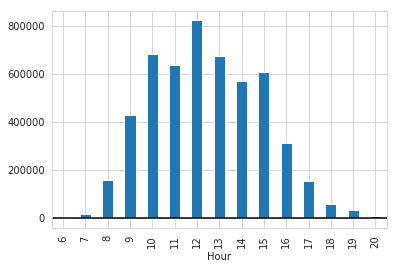

In [113]:
plt.figure()
trans2.groupby('Hour')['Quantity'].sum().plot(kind='bar')
plt.axhline(0, color='k');

**How many orders (per month)?**

In [114]:
trans2['Month'] = trans2['InvoiceDate'].apply(lambda v: splitDate(v,'Month'))
trans2['Month'] = trans2['Month'].astype('int64')
trans2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Hour,Month
1332,536536,21485,RETROSPOT HEART HOT WATER BOTTLE,3,12/1/10 13:45,4.95,18144.0,United Kingdom,2010,13,12
437734,574298,35646,VINTAGE BEAD PINK EVENING BAG,4,11/3/11 15:56,2.46,NaN,United Kingdom,2011,15,11
428289,573418,21915,RED HARMONICA IN BOX,24,10/31/11 9:35,1.25,15360.0,United Kingdom,2011,9,10
57862,541219,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,1/14/11 14:06,8.29,NaN,United Kingdom,2011,14,1
113690,545995,22469,HEART OF WICKER SMALL,16,3/8/11 13:54,1.65,15023.0,United Kingdom,2011,13,3


In [115]:
trans2.sort_values(by=['Month'],ascending=True).groupby('Month')['Quantity'].sum()

Month
1     308966
2     277989
3     351872
4     289098
5     380391
6     341623
7     391116
8     406199
9     549817
10    570532
11    740286
12    568561
Name: Quantity, dtype: int64

**Make a plot about number of orders per month**

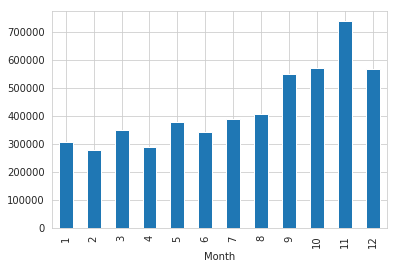

In [117]:
trans2.sort_values(by=['Month'],ascending=True).groupby('Month')['Quantity'].sum().plot(kind='bar')

**Top 10 items most sales**

In [0]:
common_items = transactions.sort_values(by=['Quantity'], ascending=False)
common_items.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/11 15:57,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/11 12:03,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/11 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/11 10:52,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,6/9/11 15:04,0.00,NaN,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/11 10:43,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/11 17:04,0.06,14609.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749.0,United Kingdom


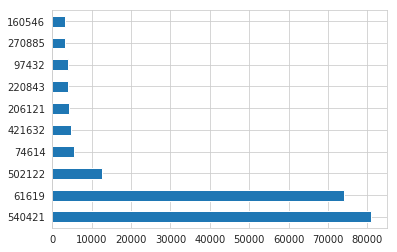

In [0]:
common_items.head(10)['Quantity'].plot(kind='barh')

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [118]:
# Your code here
trans3 = transactions[transactions['Country'] != 'United Kingdom']
trans3.sample(5)
# What can you tell about this?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Hour,Month
286640,562032,22992,REVOLVER WOODEN RULER,12,8/2/11 8:48,1.95,12347.0,Iceland,2011,8,8
34412,539353,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,12/17/10 11:30,2.95,12782.0,Portugal,2010,11,12
381771,569893,20725,LUNCH BAG RED RETROSPOT,10,10/6/11 15:51,1.65,12627.0,Germany,2011,15,10
85737,543518,85017B,ENVELOPE 50 BLOSSOM IMAGES,48,2/9/11 11:21,0.85,12753.0,Japan,2011,11,2
364191,568651,23388,WOODLAND MINI BACKPACK,4,9/28/11 12:04,4.15,12362.0,Belgium,2011,12,9


In [130]:
sale_by_country = trans3.groupby('Country')['Quantity'].sum().reset_index()
top_10_order_country = sale_by_country.sort_values(by=['Quantity'], ascending=False).head(10)
top_10_order_country

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218
3,Belgium,23152


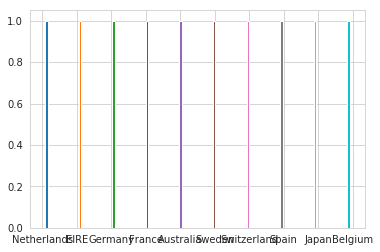

In [140]:
top_10_order_country['Country'].hist()

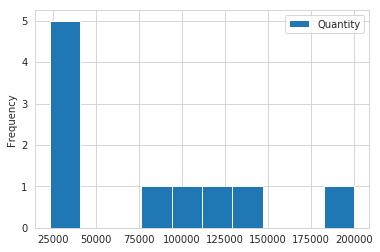

In [150]:
top_10_order_country.plot(kind='hist')

### You are awesome!!